# Project Streamlit

- modeling the Titanic dataset with **LazyPredict**

- Course Name :         Applied Machine Learning
- Course instructor:    Sohail Tehranipour
- Student Name :        Afshin Masoudi Ashtiani
- Chapter 7 -           Building a Web App for Data Scientists
- Project:              Streamlit Project
- Date :                September 2024

## Step 1: Install required libraries

In [1]:
!pip install lazypredict
!pip install dask[dataframe]

INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.9/241.9 kB 2.4 MB/s eta 0:00:00


## Step 2: Import required libraries

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import lazypredict
import matplotlib.pyplot as plt
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

## Step 3: Import the titanic dataset

In [5]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df = pd.read_csv('/content/drive/My Drive/Applied Machine Learning/Datasets/titanic_train.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.46,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.86,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.07,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.13,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.07,NaN,C


## Step 4: Split the dataset

In [8]:
# separating dataset into dependent and independent features
X = df.drop(labels= 'Survived', axis= 1)
y = df.Survived

# splitting dataset into training and testing part
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, random_state =123)

## Step 5: Create an object of LazyClassifier

In [9]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric = None)

## Step 6: Fit the data in LazyClassifier

In [10]:
models,predictions = clf.fit(X_train, X_train, y_train, y_train)
models

100%|██████████| 29/29 [00:04<00:00,  6.02it/s]

[LightGBM] [Info] Number of positive: 314, number of negative: 487
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000368 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1041
[LightGBM] [Info] Number of data points in the train set: 801, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.392010 -> initscore=-0.438871
[LightGBM] [Info] Start training from score -0.438871
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,1.00,1.00,1.00,1.00,0.17
LabelPropagation,1.00,1.00,1.00,1.00,0.21
XGBClassifier,1.00,1.00,1.00,1.00,0.34
RandomForestClassifier,1.00,1.00,1.00,1.00,0.47
DecisionTreeClassifier,1.00,1.00,1.00,1.00,0.09
ExtraTreeClassifier,1.00,1.00,1.00,1.00,0.07
ExtraTreesClassifier,1.00,1.00,1.00,1.00,0.35
LabelSpreading,1.00,1.00,1.00,1.00,0.30
BaggingClassifier,0.99,0.99,0.99,0.99,0.17


## Step 7: Visualize the accuracy of the models

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0'),
  Text(1.2000000000000002, 0, '1.2')])

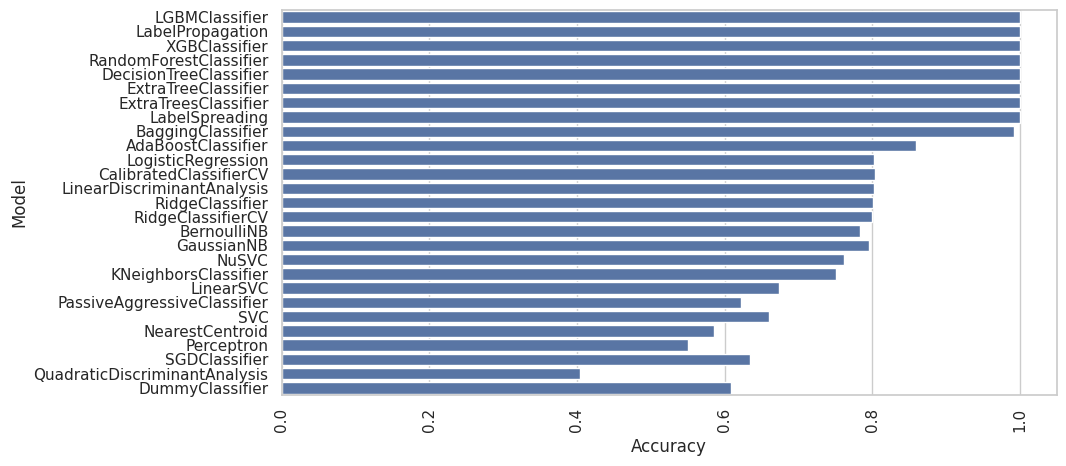

In [11]:
plt.figure(figsize=(10,5))
sns.set_theme(style='whitegrid')
ax = sns.barplot(y=models.index, x='Accuracy', data=models)
plt.xticks(rotation= 90)